In [38]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
tesla_data=yf.download("TSLA")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [42]:
# URL containing the Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Fetch the webpage content
tsla_data = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(tsla_data.text, 'html.parser')  # Use .text or .content

# Find all tables in the HTML
tesla_tables = soup.find_all('table')

# Initialize a variable to track the index of the Tesla Quarterly Revenue table
tesla_table_index = None

# Loop through the tables to find the one with "Tesla Quarterly Revenue"
for index, table in enumerate(tesla_tables):
    if "Tesla Quarterly Revenue" in str(table):
        tesla_table_index = index
        break  # Exit the loop once the correct table is found

# Initialize an empty DataFrame with columns Date and Revenue
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract the data from the correct table
for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:  # If the row is not empty
        date = col[0].text.strip()
        revenue = col[1].text.strip().replace("$", "").replace(",", "")  # Remove dollar signs and commas

        # Append the new row to the DataFrame
        new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Display the last five rows of the Tesla revenue DataFrame
last_five_rows = tesla_revenue.tail()
print(last_five_rows)

          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-12-31        
52  2009-09-30      46
53  2009-06-30      27


In [43]:
gme_data=yf.download("GME")
gme_data.reset_index(inplace=True)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691666  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


In [46]:
# Correcting and extracting GME revenue data as requested

# URL containing the GME revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Fetch the webpage content
gmeweb_data = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(gmeweb_data.text, 'html.parser')  # Use .text or .content

# Find all tables in the HTML
gme_tables = soup.find_all('table')

# Initialize a variable to track the index of the GME Quarterly Revenue table
gme_table_index = None

# Loop through the tables to find the one with "GameStop Quarterly Revenue"
for index, table in enumerate(gme_tables):
    if "GameStop Quarterly Revenue" in str(table):
        gme_table_index = index
        break  # Exit the loop once the correct table is found

# Initialize an empty DataFrame with columns Date and Revenue
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract the data from the correct table
for row in gme_tables[gme_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:  # If the row is not empty
        date = col[0].text.strip()
        revenue = col[1].text.strip().replace("$", "").replace(",", "")  # Remove dollar signs and commas

        # Append the new row to the DataFrame
        new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
        gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

# Display the last five rows of the GME revenue DataFrame
last_five_gme_rows = gme_revenue.tail()
print(last_five_gme_rows)

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


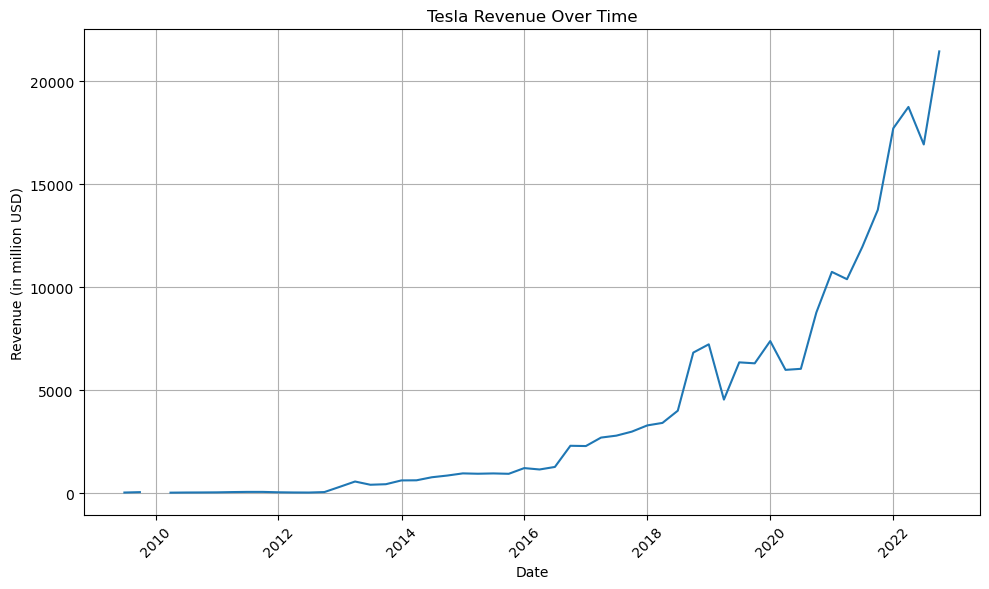

In [60]:

#  Tesla stock data for plotting
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Function to plot the Tesla stock graph
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Revenue'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Revenue (in million USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling the make_graph function to plot Tesla's stock data with a title
make_graph(tesla_revenue, "Tesla Revenue Over Time")


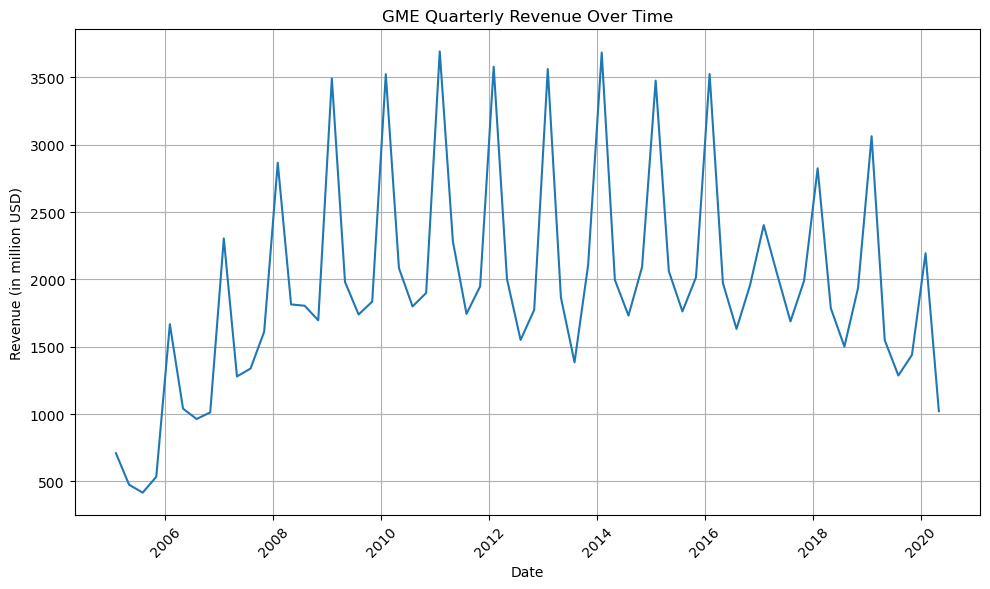

In [56]:
#  GME stock data for plotting
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Function to plot the Tesla stock graph
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Revenue'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Revenue (in million USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling the make_graph function to plot Tesla's stock data with a title
make_graph(gme_revenue, "GME Revenue Over Time")